In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv(r"C:\Users\DIU\Desktop\sonar.all-data.csv")

In [3]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [4]:
dataset.shape

(208, 61)

In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1:]

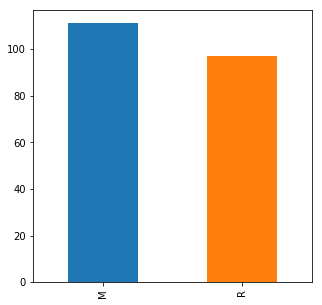

In [6]:
dataset["Class"].value_counts().sort_index().plot.bar(figsize=(5,5))

In [7]:
# one hot encoding
y = pd.get_dummies(y)

In [8]:
y.head()

,Class_M,Class_R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


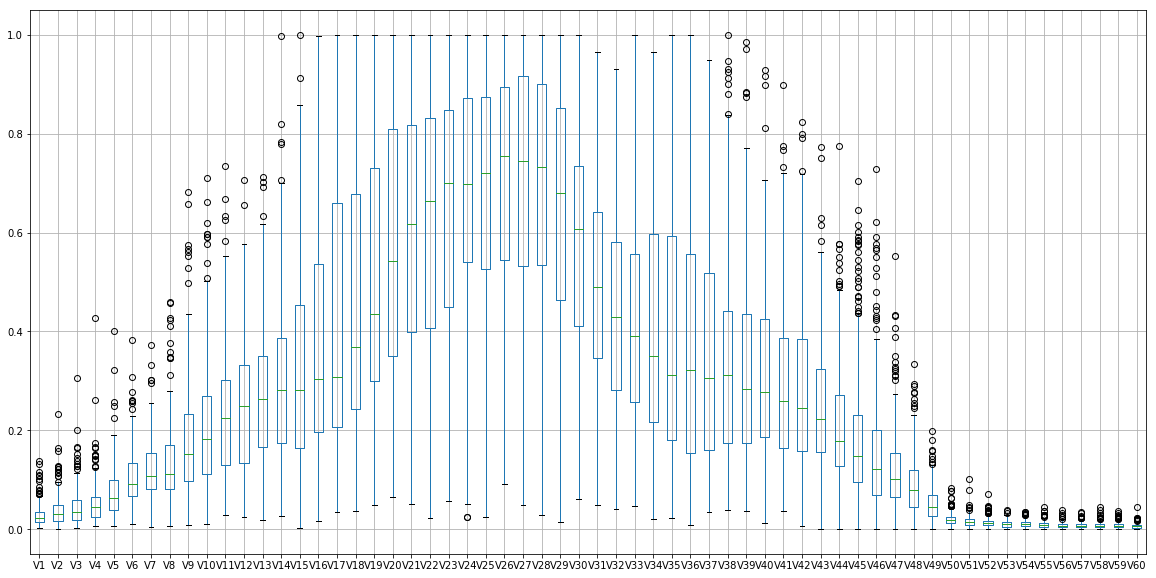

In [9]:
plt.subplots(figsize=(20,10))
X.boxplot()
plt.show()

In [10]:
# detecting Outlier
# Inter Quartile Range is the distance between the 3rd Quartile and the first Qartile

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
        
    if(flag):
        return True
    else:
        return False

def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    
    mean = X[feature].median()
    
    X.loc[X[feature] < minimum, feature] = mean
    X.loc[X[feature] > maximum, feature] = mean

In [20]:
count = 0
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        count+=1
print("%d feature contain Outlier"%(count))

11 feature contain Outlier


In [26]:
for i in range(len(X.columns)):
    remove_outlier(X.columns[i])

In [27]:
count = 0
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        count+=1
print("%d feature contain Outlier"%(count))

0 feature contain Outlier


In [25]:
del X['V49']

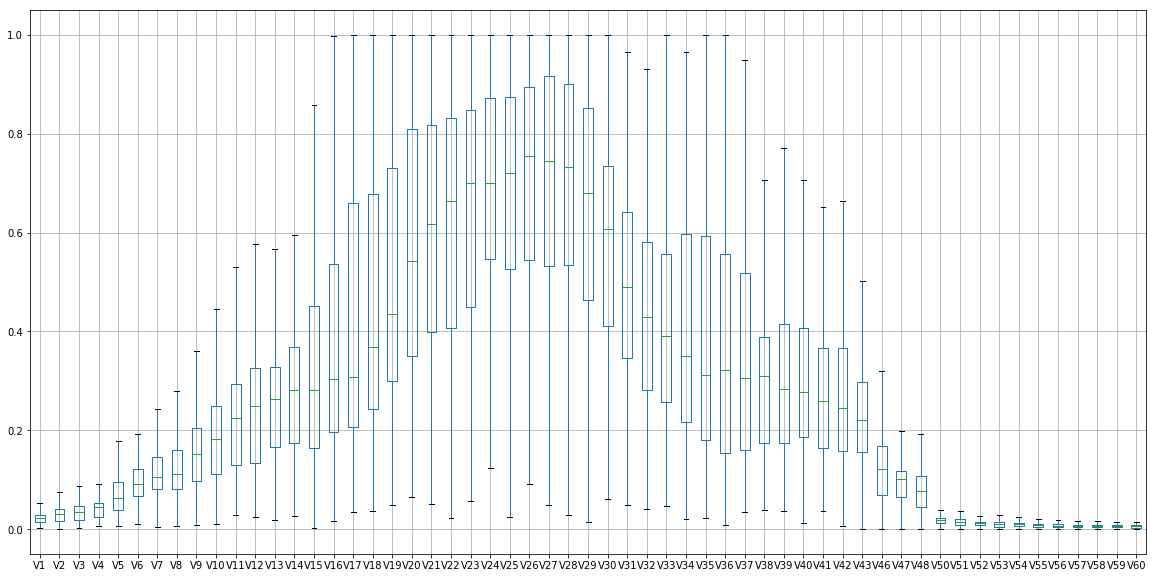

In [28]:
plt.subplots(figsize=(20,10))
X.boxplot()
plt.show()

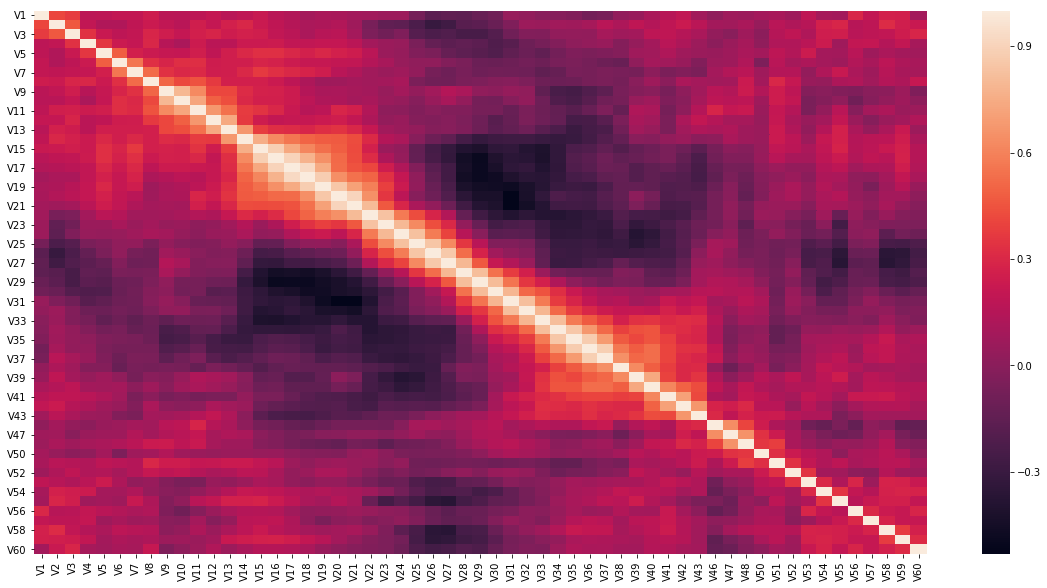

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(X.corr())

In [30]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

In [31]:
learning_rate = 0.3
trainning_epochs = 1000  # epoch means number of iteration
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]

In [32]:
# we have only two classes
# 1. Mine
# 2. Rock
# model_path store the location where we save the model

n_class = 2
model_path = "model"

In [33]:
# hidden layers
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [34]:
x = tf.placeholder(tf.float32, [None, n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros(n_class))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [35]:
# defining the weights and biases for each layer

weights = {
    "h1" : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2" : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3" : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "h4" : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    "out" : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    "b1" :  tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2" :  tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3" :  tf.Variable(tf.truncated_normal([n_hidden_3])),
    "b4" :  tf.Variable(tf.truncated_normal([n_hidden_4])),
    "out" :  tf.Variable(tf.truncated_normal([n_class]))
}

In [36]:
# defining Multilayer Perceptron
def multilayer_perceptron(x, weights, biases):
    
    # hidden layer with "relu" activation
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # hidden layer with "sigmoid" activation
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # hidden layer with "sigmoid" activation
    layer_3 = tf.add(tf.matmul(layer_2, weights["h3"]), biases["b3"])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # hidden layer with "relu" activation
    layer_4 = tf.add(tf.matmul(layer_3, weights["h4"]), biases["b4"])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights["out"]) + biases["out"]
    
    return out_layer

In [37]:
# initialize all the variables
init = tf.global_variables_initializer()

In [38]:
saver = tf.train.Saver()

In [39]:
y = multilayer_perceptron(x, weights, biases)

In [40]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y , labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [41]:
sess = tf.Session()
sess.run(init)

In [42]:
mse_history = []
accuracy_history = []

In [43]:
for epoch in range(trainning_epochs):
    sess.run(training_step, feed_dict= {x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict = {x: train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print("Accuracy: ", (sess.run(accuracy, feed_dict = {x: X_test, y_: y_test})))
    pred_y = sess.run(y, feed_dict={x : test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict = {x : train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print ("epoch: ", epoch, "- cost: ", cost, "- MSE: ", mse_, "- Training Accuracy: ", accuracy)

epoch:  0 - cost:  159.24669 - MSE:  23168.74 - Training Accuracy:  0.45783132
epoch:  1 - cost:  9.496164 - MSE:  112.92409 - Training Accuracy:  0.5421687
epoch:  2 - cost:  2.9659042 - MSE:  9.676584 - Training Accuracy:  0.45783132
epoch:  3 - cost:  0.8322036 - MSE:  2.1124218 - Training Accuracy:  0.5421687
epoch:  4 - cost:  0.7309091 - MSE:  0.9070325 - Training Accuracy:  0.45180723
epoch:  5 - cost:  0.70537543 - MSE:  0.7730962 - Training Accuracy:  0.43373495
epoch:  6 - cost:  0.6846963 - MSE:  0.5797514 - Training Accuracy:  0.5060241
epoch:  7 - cost:  0.6738535 - MSE:  0.41270316 - Training Accuracy:  0.5903614
epoch:  8 - cost:  0.67196846 - MSE:  0.4008685 - Training Accuracy:  0.560241
epoch:  9 - cost:  0.67094815 - MSE:  0.3979845 - Training Accuracy:  0.57831323
epoch:  10 - cost:  0.66929525 - MSE:  0.39845026 - Training Accuracy:  0.5481928
epoch:  11 - cost:  0.6705705 - MSE:  0.40446526 - Training Accuracy:  0.5481928
epoch:  12 - cost:  0.6663376 - MSE:  0.39

epoch:  104 - cost:  0.68437207 - MSE:  0.6460393 - Training Accuracy:  0.55421686
epoch:  105 - cost:  0.5792239 - MSE:  0.5261962 - Training Accuracy:  0.71686745
epoch:  106 - cost:  0.5544479 - MSE:  1.4833378 - Training Accuracy:  0.70481926
epoch:  107 - cost:  0.60447055 - MSE:  0.5268531 - Training Accuracy:  0.6987952
epoch:  108 - cost:  0.5607939 - MSE:  1.9238611 - Training Accuracy:  0.7289157
epoch:  109 - cost:  0.6191596 - MSE:  0.57513434 - Training Accuracy:  0.6325301
epoch:  110 - cost:  0.57361466 - MSE:  1.7819734 - Training Accuracy:  0.6566265
epoch:  111 - cost:  0.6745636 - MSE:  0.60354525 - Training Accuracy:  0.59638554
epoch:  112 - cost:  0.5663462 - MSE:  1.3782787 - Training Accuracy:  0.70481926
epoch:  113 - cost:  0.55287904 - MSE:  1.2462854 - Training Accuracy:  0.71686745
epoch:  114 - cost:  0.54611045 - MSE:  1.3112707 - Training Accuracy:  0.6927711
epoch:  115 - cost:  0.5428159 - MSE:  0.88724416 - Training Accuracy:  0.74698794
epoch:  116 -

epoch:  204 - cost:  0.4439392 - MSE:  3.1690052 - Training Accuracy:  0.76506025
epoch:  205 - cost:  0.55803216 - MSE:  0.9442255 - Training Accuracy:  0.7108434
epoch:  206 - cost:  0.4617007 - MSE:  3.8106067 - Training Accuracy:  0.7590361
epoch:  207 - cost:  0.47768658 - MSE:  0.7142121 - Training Accuracy:  0.8012048
epoch:  208 - cost:  0.4359805 - MSE:  3.70369 - Training Accuracy:  0.78313255
epoch:  209 - cost:  0.5187972 - MSE:  0.78221864 - Training Accuracy:  0.7289157
epoch:  210 - cost:  0.44474295 - MSE:  3.8686426 - Training Accuracy:  0.74698794
epoch:  211 - cost:  0.573386 - MSE:  0.86808026 - Training Accuracy:  0.6566265
epoch:  212 - cost:  0.39239722 - MSE:  2.831933 - Training Accuracy:  0.8313253
epoch:  213 - cost:  0.39398298 - MSE:  1.2828155 - Training Accuracy:  0.8614458
epoch:  214 - cost:  0.37822834 - MSE:  2.9411898 - Training Accuracy:  0.8313253
epoch:  215 - cost:  0.3900385 - MSE:  1.296151 - Training Accuracy:  0.8674699
epoch:  216 - cost:  0

epoch:  306 - cost:  0.7049685 - MSE:  1.1793761 - Training Accuracy:  0.61445785
epoch:  307 - cost:  0.4661812 - MSE:  2.0025003 - Training Accuracy:  0.7289157
epoch:  308 - cost:  0.53216463 - MSE:  2.0365033 - Training Accuracy:  0.7409639
epoch:  309 - cost:  0.36764315 - MSE:  1.6440437 - Training Accuracy:  0.8433735
epoch:  310 - cost:  0.32087523 - MSE:  0.7498795 - Training Accuracy:  0.9096386
epoch:  311 - cost:  0.30207285 - MSE:  1.7588732 - Training Accuracy:  0.92168677
epoch:  312 - cost:  0.2932213 - MSE:  1.1218091 - Training Accuracy:  0.89759034
epoch:  313 - cost:  0.2933047 - MSE:  2.2819347 - Training Accuracy:  0.90361446
epoch:  314 - cost:  0.29137516 - MSE:  1.334149 - Training Accuracy:  0.90361446
epoch:  315 - cost:  0.29362643 - MSE:  3.0250921 - Training Accuracy:  0.8915663
epoch:  316 - cost:  0.30764621 - MSE:  1.3582925 - Training Accuracy:  0.8674699
epoch:  317 - cost:  0.35430327 - MSE:  4.749934 - Training Accuracy:  0.8373494
epoch:  318 - cos

epoch:  407 - cost:  0.5148027 - MSE:  2.0215108 - Training Accuracy:  0.70481926
epoch:  408 - cost:  0.6608753 - MSE:  1.5244554 - Training Accuracy:  0.6566265
epoch:  409 - cost:  0.55871284 - MSE:  3.0850177 - Training Accuracy:  0.6686747
epoch:  410 - cost:  0.52421856 - MSE:  1.1505274 - Training Accuracy:  0.7108434
epoch:  411 - cost:  0.37567452 - MSE:  2.4347632 - Training Accuracy:  0.8072289
epoch:  412 - cost:  0.36588764 - MSE:  1.200752 - Training Accuracy:  0.8493976
epoch:  413 - cost:  0.3384163 - MSE:  2.1405835 - Training Accuracy:  0.8433735
epoch:  414 - cost:  0.33456028 - MSE:  1.4593179 - Training Accuracy:  0.87349397
epoch:  415 - cost:  0.33765686 - MSE:  2.2194018 - Training Accuracy:  0.85542166
epoch:  416 - cost:  0.3805143 - MSE:  1.5710012 - Training Accuracy:  0.82530123
epoch:  417 - cost:  0.46233493 - MSE:  2.9505033 - Training Accuracy:  0.74698794
epoch:  418 - cost:  0.74841815 - MSE:  1.5272238 - Training Accuracy:  0.6204819
epoch:  419 - co

epoch:  508 - cost:  0.36922988 - MSE:  3.0065067 - Training Accuracy:  0.8192771
epoch:  509 - cost:  0.36525366 - MSE:  2.0168362 - Training Accuracy:  0.87349397
epoch:  510 - cost:  0.36050063 - MSE:  3.3068562 - Training Accuracy:  0.8313253
epoch:  511 - cost:  0.3634737 - MSE:  2.0303686 - Training Accuracy:  0.8674699
epoch:  512 - cost:  0.3612796 - MSE:  3.8585079 - Training Accuracy:  0.8192771
epoch:  513 - cost:  0.37954667 - MSE:  1.6647106 - Training Accuracy:  0.8614458
epoch:  514 - cost:  0.3575491 - MSE:  4.2953944 - Training Accuracy:  0.82530123
epoch:  515 - cost:  0.3622056 - MSE:  1.8611689 - Training Accuracy:  0.8674699
epoch:  516 - cost:  0.348234 - MSE:  4.530973 - Training Accuracy:  0.82530123
epoch:  517 - cost:  0.36225885 - MSE:  1.7965574 - Training Accuracy:  0.8674699
epoch:  518 - cost:  0.33550262 - MSE:  4.682914 - Training Accuracy:  0.8313253
epoch:  519 - cost:  0.3417736 - MSE:  2.0789497 - Training Accuracy:  0.8674699
epoch:  520 - cost:  0

epoch:  609 - cost:  0.23006237 - MSE:  3.7520466 - Training Accuracy:  0.92168677
epoch:  610 - cost:  0.20171662 - MSE:  5.972095 - Training Accuracy:  0.93373495
epoch:  611 - cost:  0.19667412 - MSE:  3.9397209 - Training Accuracy:  0.92771083
epoch:  612 - cost:  0.21532644 - MSE:  7.354363 - Training Accuracy:  0.8915663
epoch:  613 - cost:  0.26944023 - MSE:  3.2503026 - Training Accuracy:  0.87349397
epoch:  614 - cost:  0.4276334 - MSE:  11.469671 - Training Accuracy:  0.813253
epoch:  615 - cost:  0.7362545 - MSE:  2.8297145 - Training Accuracy:  0.62650603
epoch:  616 - cost:  0.32559103 - MSE:  3.7902126 - Training Accuracy:  0.88554215
epoch:  617 - cost:  0.28211436 - MSE:  1.8388832 - Training Accuracy:  0.93373495
epoch:  618 - cost:  0.2443615 - MSE:  3.9049373 - Training Accuracy:  0.90361446
epoch:  619 - cost:  0.26395357 - MSE:  1.8685555 - Training Accuracy:  0.92168677
epoch:  620 - cost:  0.23177445 - MSE:  4.9392514 - Training Accuracy:  0.92168677
epoch:  621 

epoch:  710 - cost:  0.25268668 - MSE:  3.1004956 - Training Accuracy:  0.8915663
epoch:  711 - cost:  0.24411376 - MSE:  7.88509 - Training Accuracy:  0.9096386
epoch:  712 - cost:  0.34579867 - MSE:  2.5315306 - Training Accuracy:  0.8493976
epoch:  713 - cost:  0.19109975 - MSE:  4.339431 - Training Accuracy:  0.92771083
epoch:  714 - cost:  0.1379505 - MSE:  3.9899974 - Training Accuracy:  0.9879518
epoch:  715 - cost:  0.1323935 - MSE:  5.7023063 - Training Accuracy:  0.97590363
epoch:  716 - cost:  0.13155805 - MSE:  4.3061576 - Training Accuracy:  0.9939759
epoch:  717 - cost:  0.1275229 - MSE:  6.1561017 - Training Accuracy:  0.9578313
epoch:  718 - cost:  0.12586978 - MSE:  4.2550836 - Training Accuracy:  0.9939759
epoch:  719 - cost:  0.12276352 - MSE:  6.3638787 - Training Accuracy:  0.9578313
epoch:  720 - cost:  0.12207633 - MSE:  4.283925 - Training Accuracy:  0.9939759
epoch:  721 - cost:  0.12038915 - MSE:  6.6671305 - Training Accuracy:  0.9578313
epoch:  722 - cost:  

epoch:  811 - cost:  0.30842716 - MSE:  2.582893 - Training Accuracy:  0.8614458
epoch:  812 - cost:  0.3016519 - MSE:  5.1711407 - Training Accuracy:  0.8373494
epoch:  813 - cost:  0.3392281 - MSE:  2.6254299 - Training Accuracy:  0.8373494
epoch:  814 - cost:  0.33340788 - MSE:  5.3222766 - Training Accuracy:  0.8072289
epoch:  815 - cost:  0.36740243 - MSE:  2.6959622 - Training Accuracy:  0.7891566
epoch:  816 - cost:  0.35832667 - MSE:  5.630565 - Training Accuracy:  0.8072289
epoch:  817 - cost:  0.4082172 - MSE:  2.2586157 - Training Accuracy:  0.76506025
epoch:  818 - cost:  0.33970636 - MSE:  5.126949 - Training Accuracy:  0.813253
epoch:  819 - cost:  0.31544933 - MSE:  2.5376685 - Training Accuracy:  0.8493976
epoch:  820 - cost:  0.26676232 - MSE:  4.903572 - Training Accuracy:  0.85542166
epoch:  821 - cost:  0.2535254 - MSE:  3.1215672 - Training Accuracy:  0.88554215
epoch:  822 - cost:  0.23825873 - MSE:  5.2565956 - Training Accuracy:  0.8674699
epoch:  823 - cost:  0

epoch:  915 - cost:  0.037695333 - MSE:  9.269511 - Training Accuracy:  1.0
epoch:  916 - cost:  0.03589829 - MSE:  9.643016 - Training Accuracy:  1.0
epoch:  917 - cost:  0.036597654 - MSE:  9.225035 - Training Accuracy:  1.0
epoch:  918 - cost:  0.03492262 - MSE:  9.823358 - Training Accuracy:  1.0
epoch:  919 - cost:  0.03586176 - MSE:  9.494948 - Training Accuracy:  1.0
epoch:  920 - cost:  0.033504795 - MSE:  9.961485 - Training Accuracy:  1.0
epoch:  921 - cost:  0.032503843 - MSE:  9.646456 - Training Accuracy:  1.0
epoch:  922 - cost:  0.031563967 - MSE:  10.095716 - Training Accuracy:  1.0
epoch:  923 - cost:  0.030902816 - MSE:  9.906409 - Training Accuracy:  1.0
epoch:  924 - cost:  0.03045164 - MSE:  10.109263 - Training Accuracy:  1.0
epoch:  925 - cost:  0.029865244 - MSE:  10.07329 - Training Accuracy:  1.0
epoch:  926 - cost:  0.029516643 - MSE:  10.231046 - Training Accuracy:  1.0
epoch:  927 - cost:  0.02901376 - MSE:  10.237795 - Training Accuracy:  1.0
epoch:  928 -

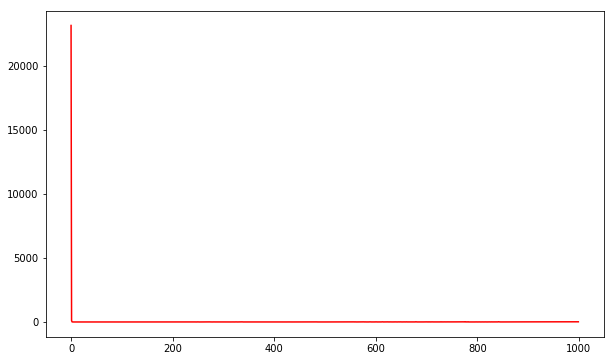

In [44]:
plt.subplots(figsize=(10, 6))
plt.plot(mse_history, 'r')
plt.show()

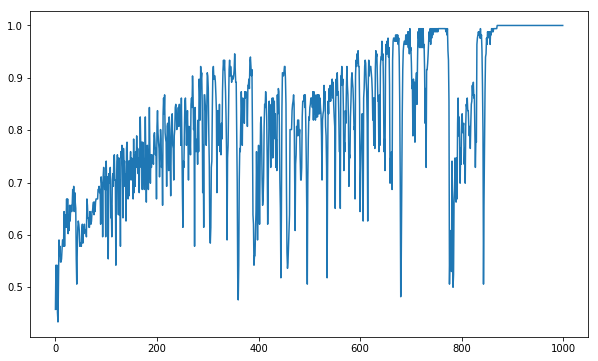

In [45]:
plt.subplots(figsize=(10, 6))
plt.plot(accuracy_history)
plt.show()

In [46]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Test Accuracy : ", (sess.run(accuracy, feed_dict = {x: test_x, y_:test_y})))

Test Accuracy :  0.8333333


In [47]:
pred_y = sess.run(y, feed_dict = {x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))

print("MSE[Mean Squared Error]: %.4f" % (sess.run(mse)))

MSE[Mean Squared Error]: 14.1610
